<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-and-read-inputs" data-toc-modified-id="Import-and-read-inputs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import and read inputs</a></span></li><li><span><a href="#Visualize-image" data-toc-modified-id="Visualize-image-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualize image</a></span><ul class="toc-item"><li><span><a href="#Plot-input-images" data-toc-modified-id="Plot-input-images-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Plot input images</a></span></li><li><span><a href="#Changing-transparency" data-toc-modified-id="Changing-transparency-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Changing transparency</a></span></li><li><span><a href="#Get-image-size" data-toc-modified-id="Get-image-size-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Get image size</a></span></li><li><span><a href="#Changing-color-scheme" data-toc-modified-id="Changing-color-scheme-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Changing color scheme</a></span><ul class="toc-item"><li><span><a href="#Gray" data-toc-modified-id="Gray-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Gray</a></span></li><li><span><a href="#Lab-color" data-toc-modified-id="Lab-color-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Lab color</a></span></li><li><span><a href="#Plot" data-toc-modified-id="Plot-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Plot</a></span></li></ul></li></ul></li><li><span><a href="#Translation" data-toc-modified-id="Translation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Translation</a></span></li><li><span><a href="#Skeletonize" data-toc-modified-id="Skeletonize-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Skeletonize</a></span></li><li><span><a href="#Canny-edge-detection" data-toc-modified-id="Canny-edge-detection-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Canny edge detection</a></span><ul class="toc-item"><li><span><a href="#Auto-Canny-function-call" data-toc-modified-id="Auto-Canny-function-call-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Auto Canny function call</a></span></li><li><span><a href="#How-does-that-work?" data-toc-modified-id="How-does-that-work?-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>How does that work?</a></span></li></ul></li><li><span><a href="#Denoising-techniques" data-toc-modified-id="Denoising-techniques-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Denoising techniques</a></span></li><li><span><a href="#Blurring-techniques" data-toc-modified-id="Blurring-techniques-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Blurring techniques</a></span></li><li><span><a href="#Discrete-Fourier-transform" data-toc-modified-id="Discrete-Fourier-transform-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Discrete Fourier transform</a></span></li></ul></div>

Goal: Try out different functionalities offered by imutils, to try and understand how image processing works

## Import and read inputs

In [12]:
import imutils
import cv2

import pdb
from math import ceil

from matplotlib import pyplot as plt
%matplotlib inline

In [13]:
path_input_lav = r'/Users/shyamravikumar/Documents/Box Sync/Final Project - Image Detection/03 Defect Images/Organized/Defective/Sample 6 - Pattern 1/4.JPG'
path_input_ldl = r'/Users/shyamravikumar/Documents/Box Sync/Final Project - Image Detection/03 Defect Images/Sample Pics/01 Defective/02 LDL/Delamination on Laminate at no transition.jpg'

In [14]:
img_input_lav = cv2.imread(path_input_lav)

img_input_ldl = cv2.imread(path_input_ldl)

## Visualize image

Set default image width and height

In [20]:

height=12
aspect_ratio = img_input_lav.shape[1]/img_input_lav.shape[0]
width=aspect_ratio*height

plt.rcParams['figure.figsize'] = (width,height)

Helper function to plot 1 or more images

In [21]:
def plot_images(**kwargs):
    """
    List of images to show, with the variable name used as the plot title
    """
    num_images = len(kwargs)
    fig,ax = plt.subplots(nrows=ceil(num_images/2),ncols=2,sharex=True)
    axs = ax.flatten()

    i=0
    for key,val in kwargs.items():
        # In the Python bindings of OpenCV, images are represented as NumPy arrays in BGR order. This works fine when using the cv2.imshow function. However, if you intend on using Matplotlib, the plt.imshow function assumes the image is in RGB order. A simple call to cv2.cvtColor will resolve this problem, or you can use the opencv2matplotlib convenience function.
        axs[i].imshow(imutils.opencv2matplotlib(val))
        axs[i].set_title(key,fontdict={'fontsize':12,'color':'white'})
        i+=1
    if num_images%2==1:
        # Remove visibility of last panel, if an odd number of images are passed
        axs[i].set_visible(False)
#     axs[1].imshow(img_input_lav)

### Plot input images

LAV image

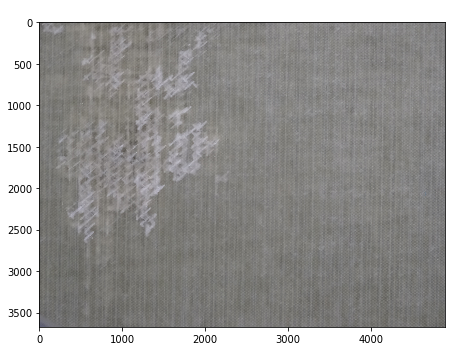

In [24]:
plot_images(input_lav=img_input_lav)

LDL image

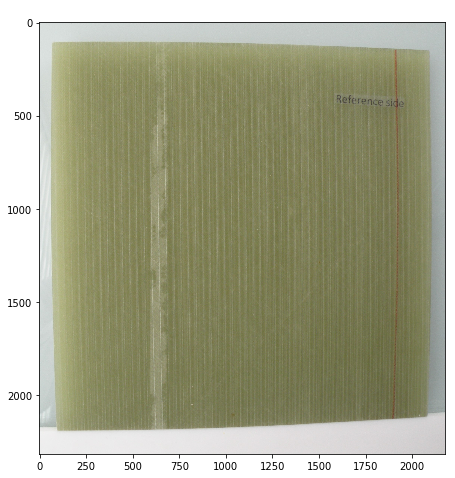

In [21]:
plot_images(input_ldl=img_input_ldl)

### Changing transparency

In [10]:
# alpha=0.5
# cv2.imshow("LDL Image at alpha=%s"%alpha,img_input_ldl)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Text(0.5, 1.0, 'LDL Image at alpha={{alpha}}')

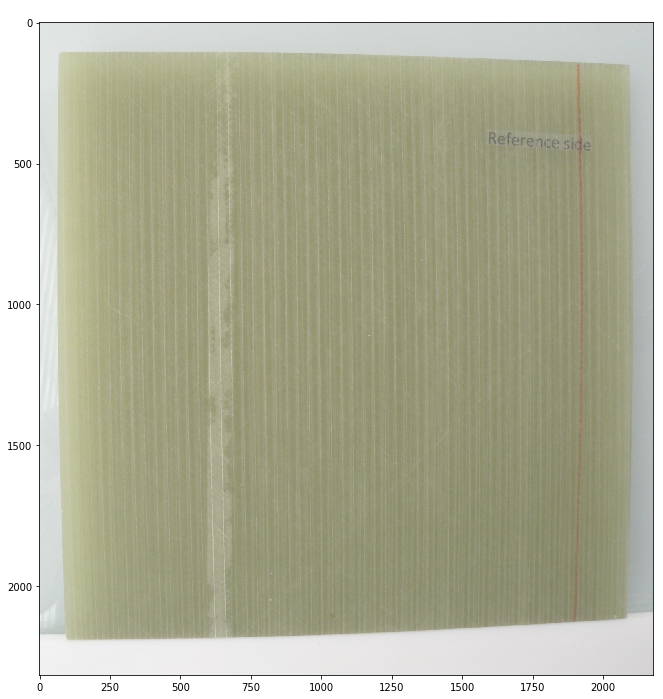

In [27]:
alpha=0.8
plt.imshow(imutils.opencv2matplotlib(img_input_ldl),alpha=alpha)
plt.title("LDL Image at alpha={{alpha}}",fontdict={'fontsize':12,'color':'white'})

### Get image size

In [12]:
img_input_lav.shape

(3672, 4896, 3)

### Changing color scheme

#### Gray

In [33]:
gray = cv2.cvtColor(img_input_ldl, cv2.COLOR_BGR2GRAY)

In [34]:
gray.shape

(2315, 2178)

#### Lab color

In [35]:
lab = cv2.cvtColor(img_input_ldl, cv2.COLOR_BGR2LAB)

In [36]:
lab.shape

(2315, 2178, 3)

#### Plot

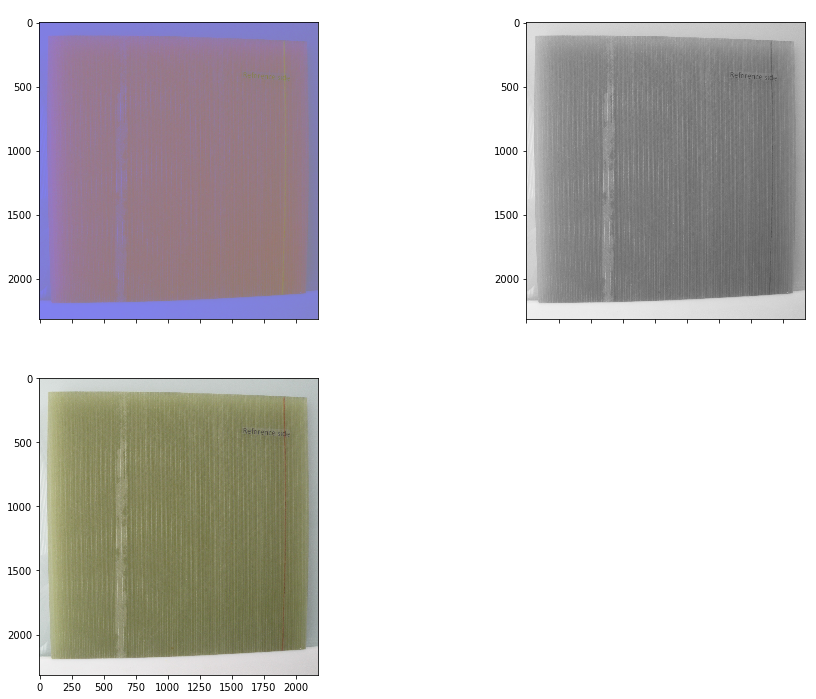

In [37]:
plot_images(lab=lab,gray=gray,input=img_input_ldl)

## Translation

In [16]:
x_movements = range(25,img_input_lav.shape[1],500)
y_movements = range(50,img_input_lav.shape[0],500)

x_movements = x_movements[:min(len(x_movements),len(y_movements))]
y_movements = y_movements[:min(len(x_movements),len(y_movements))]

list_translations = zip(x_movements,y_movements)

In [17]:
translated_images={}

for x,y in list_translations:
    translated_images["%s_%s"%(x,y)] = imutils.translate(img_input_lav,x,y)

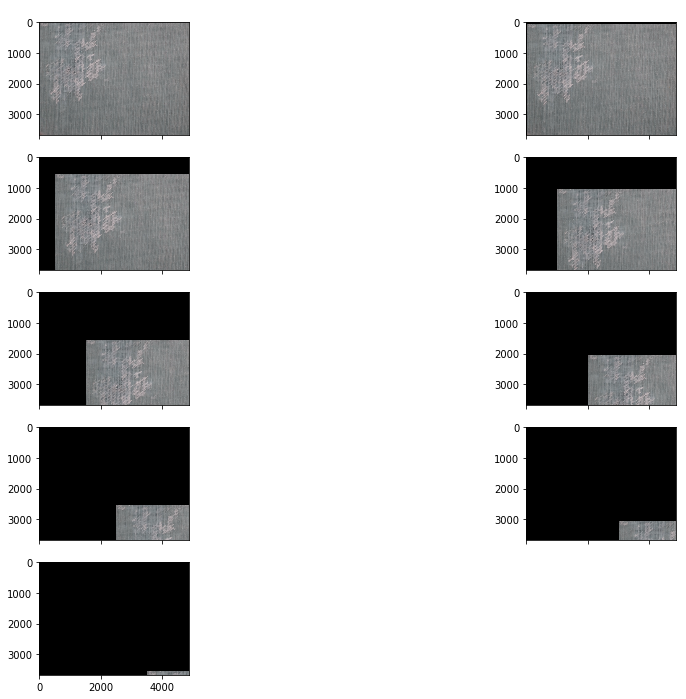

In [18]:
plot_images(input=img_input_lav,**translated_images)

## Skeletonize

Takes too much time to execute - to see what the o/p looks like, take a look at 
https://github.com/jrosebr1/imutils#skeletonization

In [28]:
gray = cv2.cvtColor(img_input_lav, cv2.COLOR_BGR2GRAY)

In [30]:
skeleton = imutils.skeletonize(gray,size=(3,3))
plot_images(Skeleton=skeleton)
# cv2.imshow("Skeleton", skeleton)

KeyboardInterrupt: 

## Canny edge detection

### Auto Canny function call

The Canny edge detection algorithm can be broken down into 5 steps:<br>
<ul>
    <li>Step 1: Smooth the image using a Gaussian filter to remove high frequency noise.</li>
    <li>Step 2: Compute the gradient intensity representations of the image.</li>
    <li>Step 3: Apply non-maximum suppression to remove “false” responses to to edge detection.</li>
    <li>Step 4: Apply thresholding using a lower and upper boundary on the gradient values.</li>
    <li>Step 5: Track edges using hysteresis by suppressing weak edges that are not connected to strong edges.</li>
</ul>
<u>Source</u>: https://www.pyimagesearch.com/2015/04/06/zero-parameter-automatic-canny-edge-detection-with-python-and-opencv/

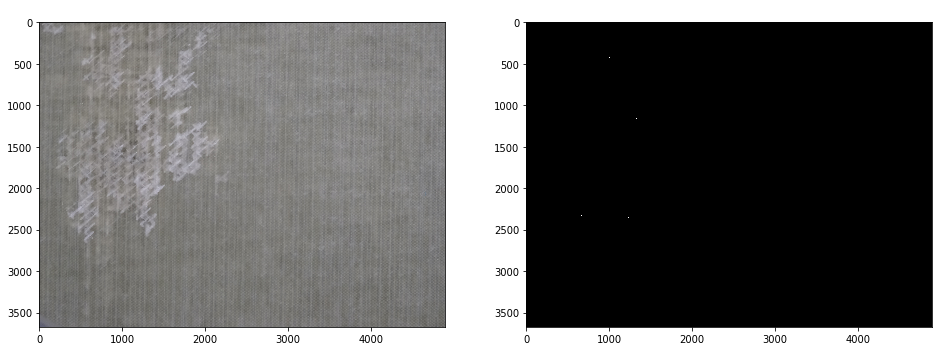

In [31]:
gray = cv2.cvtColor(img_input_lav, cv2.COLOR_BGR2GRAY)
edgeMap = imutils.auto_canny(gray)
plot_images(orig=img_input_lav,edges=edgeMap)

### How does that work?

In [33]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    # return the edged image
    return edged

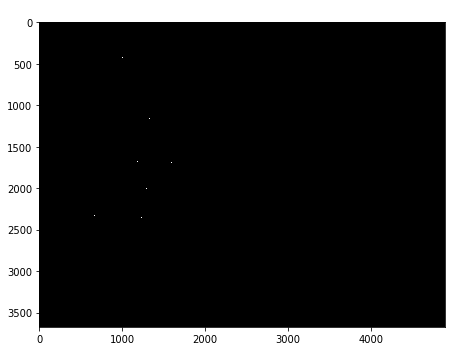

In [37]:
# plot_images(test=cv2.Canny(img_input_lav,0.5,0.5))
plot_images(test=auto_canny(img_input_lav,sigma=0.01))

There are 2 additional steps being missed - Conversion to grayscale, followed by application of a blur

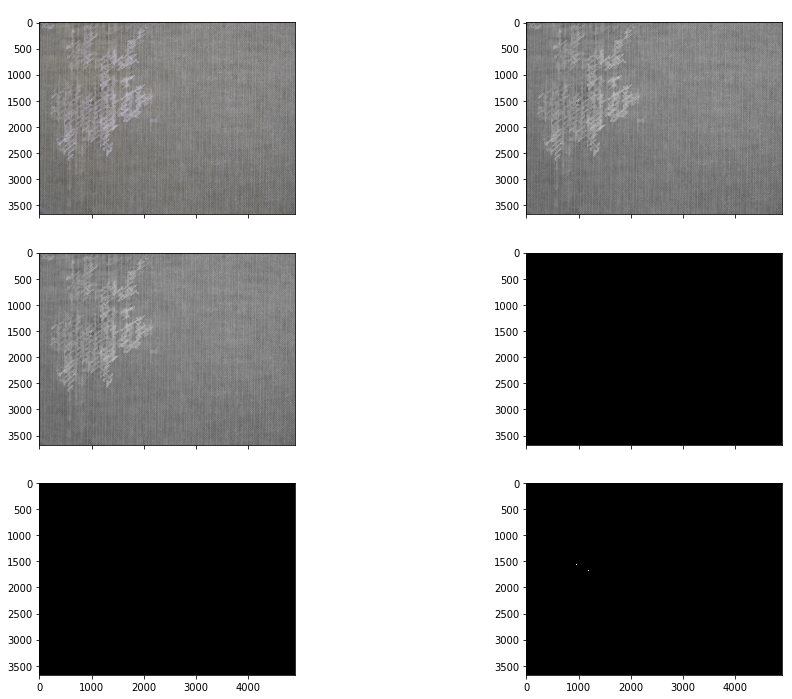

In [38]:
gray = cv2.cvtColor(img_input_lav, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

# apply Canny edge detection using a wide threshold, tight
# threshold, and automatically determined threshold
wide = cv2.Canny(blurred, 10, 200)
tight = cv2.Canny(blurred, 225, 250)
auto = auto_canny(blurred)

plot_images(default=img_input_lav,gray=gray,blurred=blurred,wide=wide,tight=tight,auto=auto)

Problem is that the blurring is not effective. We need to remove the background patterns first. How?

Solution 1:

Because you only have 3 dominant colors in the image and the stripes color is different from the other objects color, you will probably get the best result by using the objects color and doing a segmentation based on it, for instance using kmeans with k=3 then replace all the pixels that belongs to the darkest cluster with the mean value of the lightest cluster.

Solution 2:

Use hough lines to detect lines in the image, Find the lightest color in the image, Draw the lines detected with the lightest color.

Both solutions can be implemented in OpenCV.

Source: https://stackoverflow.com/questions/51870113/remove-stripe-pattern-in-image-taken-by-microscope

## Denoising techniques

https://docs.opencv.org/3.1.0/d1/d79/group__photo__denoise.html#ga76abf348c234cecd0faf3c42ef3dc715

Try using denoising with grayscale version of the image, as well as the colored version

In [43]:
res=cv2.fastNlMeansDenoising(gray,h=10)

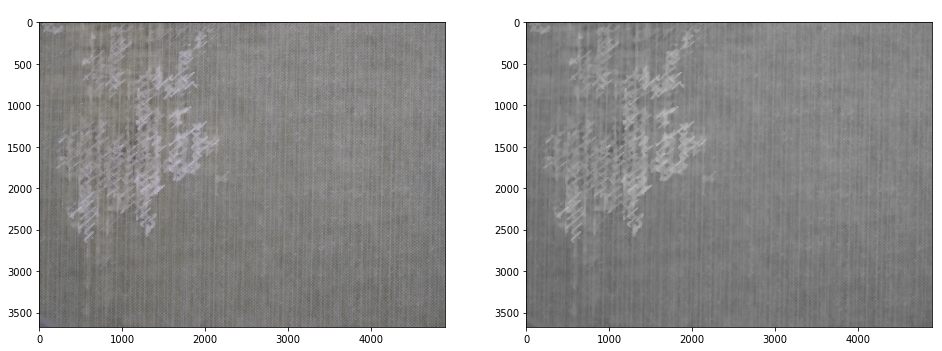

In [44]:
plot_images(gray=img_input_lav,denoised=res)

Seems to be working!! Lets try tweaking this a bit

In [46]:
res=[]
list_h=[10,20,30,40,50]
for i in list_h:
    res.append(cv2.fastNlMeansDenoising(gray,h=i))

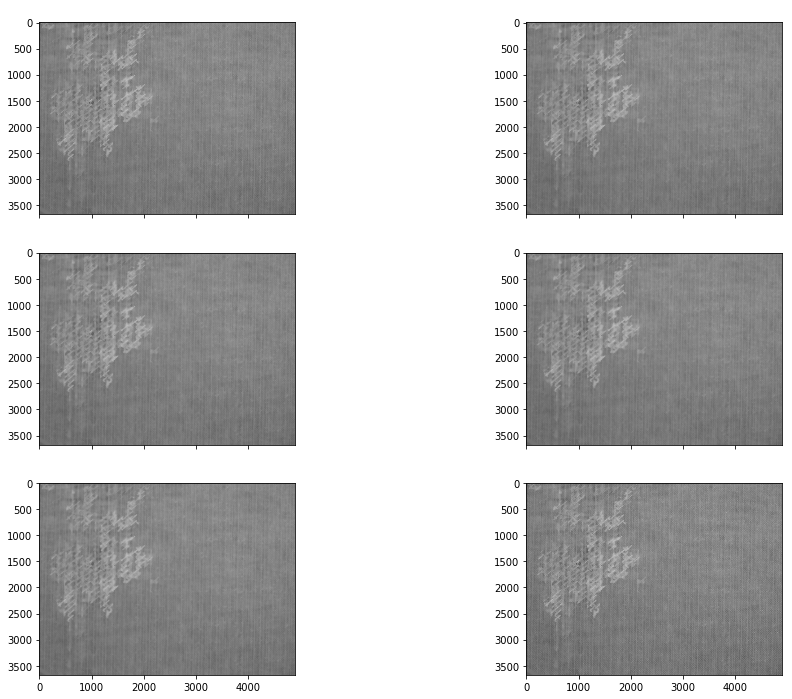

In [47]:
titles = list(map(lambda x: "denoised_h_%s"%x,list_h))
plots = dict(zip(titles,res))
plots['default']=gray
plot_images(**plots)

## Blurring techniques

https://docs.opencv.org/3.1.0/d4/d13/tutorial_py_filtering.html

## Discrete Fourier transform

https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html

In [1]:
import numpy as np

In [9]:
f = np.fft.fft2(img_input_lav)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

In [ ]:
plt.subplot(121),plt.imshow(img_input_lav, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()